In [ ]:
Name: Vedant Vijay Mete
PRN NO:- RBTL22CB074
Dataset Name:-Zoo animal classification

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
df_zoo = pd.read_csv("zoo.csv")

In [ ]:
print(df_zoo.head())

        animal  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0  b'aardvark'     1         0     0     1         0        0         1   
1  b'antelope'     1         0     0     1         0        0         0   
2      b'bass'     0         0     1     0         0        1         1   
3      b'bear'     1         0     0     1         0        0         1   
4      b'boar'     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

        type  
0  b'mammal'  
1  b'mammal'  
2    b'fish'  
3 

In [ ]:
X_zoo = df_zoo.drop(['animal', 'type'], axis=1)

In [ ]:
scaler = StandardScaler()
X_zoo_std = scaler.fit_transform(X_zoo)

In [ ]:
pca = PCA(n_components=2)
X_zoo_pca = pca.fit_transform(X_zoo_std)

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=42)
df_zoo['kmeans_cluster'] = kmeans.fit_predict(X_zoo_std)

C:\Users\RONIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\RONIT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-means clustering is a partitioning algorithm that assigns data points to clusters based on their proximity to the centroids, aiming to minimize the within-cluster sum of squares and efficiently group similar observations.







In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=7)
df_zoo['hierarchical_cluster'] = agg_clustering.fit_predict(X_zoo_std)

Agglomerative clustering is a hierarchical clustering algorithm that iteratively merges the most similar pairs of data points or clusters until all data points belong to a single cluster, forming a dendrogram structure.

In [ ]:
dbscan = DBSCAN(eps=1, min_samples=5)
df_zoo['dbscan_cluster'] = dbscan.fit_predict(X_zoo_std)

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups data points based on their density, efficiently identifying clusters of arbitrary shapes while distinguishing noise points in spatial datasets.







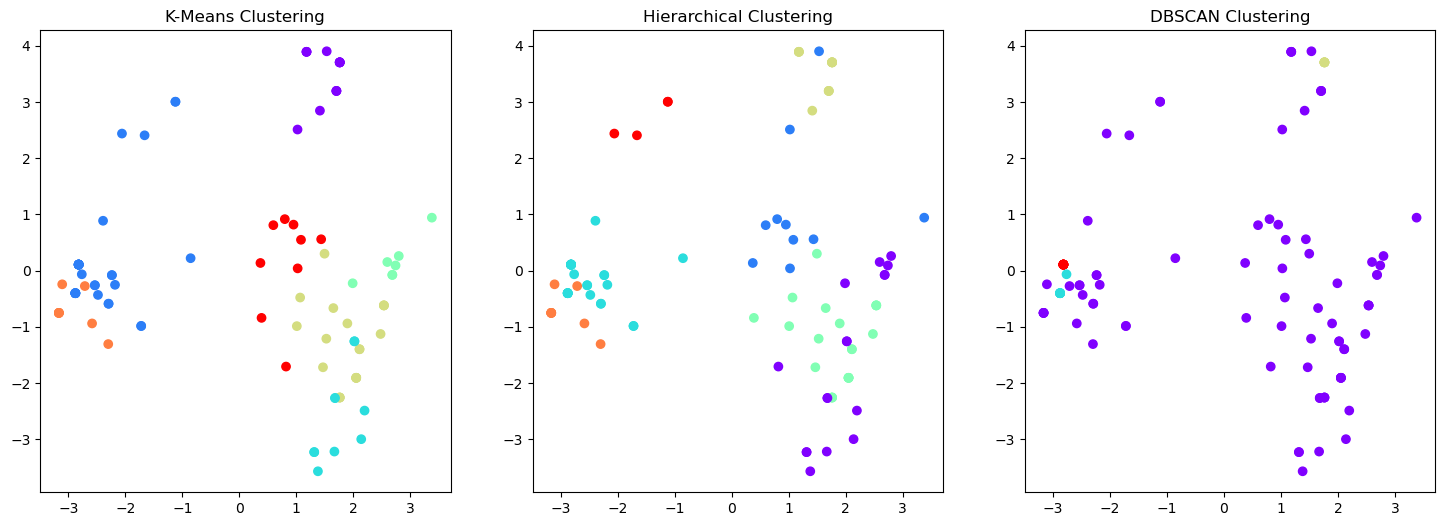

In [ ]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_zoo_pca[:, 0], X_zoo_pca[:, 1], c=df_zoo['kmeans_cluster'], cmap='rainbow')
plt.title('K-Means Clustering')

plt.subplot(1, 3, 2)
plt.scatter(X_zoo_pca[:, 0], X_zoo_pca[:, 1], c=df_zoo['hierarchical_cluster'], cmap='rainbow')
plt.title('Hierarchical Clustering')

plt.subplot(1, 3, 3)
plt.scatter(X_zoo_pca[:, 0], X_zoo_pca[:, 1], c=df_zoo['dbscan_cluster'], cmap='rainbow')
plt.title('DBSCAN Clustering')

plt.show()